In [19]:
# Step 1: Mounting to yoru own Google Colab drive
from google.colab import drive
drive.mount('/gdrive')

ModuleNotFoundError: No module named 'google'

In [20]:
# Step 2: Set the directory of the datasets as the current
%cd '/gdrive/MyDrive/ML'

[WinError 3] The system cannot find the path specified: "'/gdrive/MyDrive/ML'"
C:\Users\uSer\titanic_python


C:\Users\uSer\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\magics\osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


In [53]:
# Step 3: Install specific analysis packages
!pip install ydata_profiling

In [54]:
# Step 4: Import the following libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
# Step 3: Install specific analysis packages
!pip install --upgrade scikit-learn
!pip install -U imbalanced-learn


In [56]:
# Step 4: Import the following libraries
import pandas as pd
import numpy as np
from numpy import mean, std
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.utils import shuffle
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, chi2 # for chi-squared feature selection
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler # Import the OrdinalEncoder class from sklearn.preprocessing
from sklearn.decomposition import PCA # Import the PCA class from sklearn.decomposition
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, GridSearchCV, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline # Import the Pipeline class from sklearn.pipeline
from sklearn.covariance import ShrunkCovariance, LedoitWolf
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE


In [57]:
# Step 5: Create a sample DataFrame with 10 rows and 110 columns filled with random numbers
# Write your code here
num_rows = 10  # Number of rows
num_cols = 110  # Number of columns
data = np.random.rand(num_rows, num_cols)  # Generate random data
df = pd.DataFrame(data, columns=[f'col_{i}' for i in range(num_cols)])  # Create DataFrame


In [58]:
# Step 6: Print the DataFrame
# Write your code here
print(df)

      col_0     col_1     col_2     col_3     col_4  ...   col_105   col_106  \
0  0.099888  0.649507  0.115950  0.062272  0.001711  ...  0.970881  0.927635   
1  0.313669  0.163538  0.103644  0.047578  0.763551  ...  0.478693  0.314305   
2  0.370022  0.687722  0.668453  0.746739  0.561420  ...  0.080141  0.903518   
3  0.917280  0.098561  0.526242  0.239074  0.228926  ...  0.051750  0.550962   
4  0.612921  0.326962  0.697781  0.151436  0.230194  ...  0.090224  0.207889   
5  0.042247  0.393359  0.286734  0.681172  0.264784  ...  0.511099  0.868510   
6  0.977241  0.047730  0.230763  0.042934  0.489490  ...  0.440177  0.413979   
7  0.625168  0.578805  0.956922  0.038508  0.244974  ...  0.482243  0.378377   
8  0.231630  0.619994  0.997647  0.521120  0.944791  ...  0.189256  0.698877   
9  0.532428  0.970820  0.288724  0.351215  0.498853  ...  0.085976  0.422151   

    col_107   col_108   col_109  
0  0.129224  0.511040  0.640927  
1  0.718686  0.838515  0.956381  
2  0.181227  0.92

In [59]:
# Step 7: Set the maximum number of columns to display
# Write your code here
pd.set_option('display.max_columns', 10)
print(df)

      col_0     col_1     col_2     col_3     col_4  ...   col_105   col_106  \
0  0.099888  0.649507  0.115950  0.062272  0.001711  ...  0.970881  0.927635   
1  0.313669  0.163538  0.103644  0.047578  0.763551  ...  0.478693  0.314305   
2  0.370022  0.687722  0.668453  0.746739  0.561420  ...  0.080141  0.903518   
3  0.917280  0.098561  0.526242  0.239074  0.228926  ...  0.051750  0.550962   
4  0.612921  0.326962  0.697781  0.151436  0.230194  ...  0.090224  0.207889   
5  0.042247  0.393359  0.286734  0.681172  0.264784  ...  0.511099  0.868510   
6  0.977241  0.047730  0.230763  0.042934  0.489490  ...  0.440177  0.413979   
7  0.625168  0.578805  0.956922  0.038508  0.244974  ...  0.482243  0.378377   
8  0.231630  0.619994  0.997647  0.521120  0.944791  ...  0.189256  0.698877   
9  0.532428  0.970820  0.288724  0.351215  0.498853  ...  0.085976  0.422151   

    col_107   col_108   col_109  
0  0.129224  0.511040  0.640927  
1  0.718686  0.838515  0.956381  
2  0.181227  0.92

What do you notice about the DataFrame output before and after setting the display option?

Why is it beneficial to adjust the display settings when working with large datasets?

We will now start working with the Porte Seguro's dataset for safe driver prediction. Download the train.csv and test.csv files from Blackboard and upload to Google Drive.

In [60]:
# Step 8: Load the training and data from 'train.csv'
# Write your code here
train = pd.read_csv('train.csv')

In [61]:
# Step 9: Load the testing data from 'test.csv'
# Write your code here
test=pd.read_csv('test.csv')

In [62]:
# Step 10: Display the first few rows of the training data
# Write your code here
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,...,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,...,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,...,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,...,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,...,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,...,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,...,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,...,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,...,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,...,0,237736,30.0708,NaN,C


In [63]:
# Step 11: Display the last few rows of the training data
#Write your code here
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,...,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,...,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,...,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,...,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,...,0,370376,7.75,NaN,Q


In [64]:
# Step 12: Get a concise summary of the training data, including essential information about the DataFrame's structure, overall layout and data types.
# Write your code here
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [65]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Observation:


*   We see that the data type is integer or float.
*   No null values are present in the train dataset. That's normal, because missing values are replaced by -1.



In [66]:
# Step 13: Display the number of rows and columns in the training and testing data.
#Write your code here.
print("Train dataset (rows, cols):",train.shape, "\nTest dataset (rows, cols):",test.shape)

Train dataset (rows, cols): (891, 12) 
Test dataset (rows, cols): (418, 11)


In [67]:
# Step 14: Using the ydata_profiling package, generate a profile report for the training data.
# Write your code here.
from ydata_profiling import ProfileReport
profile = ProfileReport(train,
                        title="Pandas Profiling Report")
profile.to_notebook_iframe()

ModuleNotFoundError: No module named 'ipywidgets'

In [ ]:
# Step 15: Save the report to a file.
# Write your code here.
profile.to_file("pandas_profiling_report.html")

# Step 16: Download the report from Google Drive and open in a browser.
What are your observations on the following:


*   What percentage of the data is missing?
*   What datatypes are present in the dataset?
*   Do any of the variables show high correlation with one another?
*   Are any of the variables, incuding the target variable, imbalanced?
*   What do the summary statistics (mean, median, standard deviation) tell you about the distribution of numerical columns?
*   Are there any surprising values, such as outliers or large standard deviations?
*   What does the correlation matrix reveal about the relationships between different features?














# Metadata

In [68]:
# Step 17: Inspect the features in the columns, using train.columns
# Write your code here
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [69]:
# Step 18: Create metadata Meta1, based on Stanley Smith Steven's definition of different variables: Binary, Nominal, Interval, Ordinal.
# Write your code here
data = []
for feature in train.columns:
    # Defining the role
    if feature == 'Survived':
        role = 'target'
    elif feature == 'PassengerId':
        role = 'id'
    else:
        role = 'input'

    # Defining the level
    if feature == 'Survived':
        level = 'binary'
    elif feature == 'PassengerId':
        level = 'nominal'
    elif feature in ['Pclass', 'SibSp', 'Parch']:
        level = 'ordinal'
    elif feature in ['Fare', 'Age']:  # Continuous variables
        level = 'interval'
    elif train[feature].dtype == object:  # Categorical text fields
        level = 'nominal'
    else:
        level = 'nominal'

    # Initialize keep to True for all variables except for id
    keep = True
    if feature == 'PassengerId':
        keep = False

    # Defining the data type
    dtype = train[feature].dtype

    # Creating a Dict that contains all the metadata for the variable
    feature_dict = {
        'varname': feature,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    data.append(feature_dict)

meta1 = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta1.set_index('varname', inplace=True)
meta1

,role,level,keep,dtype
varname,,,,
PassengerId,id,nominal,False,int64
Survived,target,binary,True,int64
Pclass,input,ordinal,True,int64
Name,input,nominal,True,object
Sex,input,nominal,True,object
Age,input,interval,True,float64
SibSp,input,ordinal,True,int64
Parch,input,ordinal,True,int64
Ticket,input,nominal,True,object


In [70]:
# Step 19: Create metadata Meta2, with more user-friendly  variable labels.
# Binary, Categorical (Nominal), Real (Interval), Integer (Ordinal)
# Write your code here
data = []
for feature in train.columns:
    # Defining the role
    if feature == 'Survived':
        use = 'target'
    elif feature == 'PassengerId':
        use = 'id'
    else:
        use = 'input'

    # Defining the type
    if feature == 'Survived':
        type_ = 'binary'
    elif feature == 'PassengerId':
        type_ = 'categorical'
    elif train[feature].dtype == float:
        type_ = 'real'
    elif train[feature].dtype == int:
        type_ = 'integer'
    else:
        type_ = 'categorical'

    # Initialize preserve to True for all variables except for id
    preserve = True
    if feature == 'PassengerId':
        preserve = False

    # Defining the data type
    dtype = train[feature].dtype

    #category = 'none'
    # Defining the category
    if feature in ['Name', 'Ticket', 'Cabin']:
        category = 'identifier'
    elif feature in ['Embarked', 'Sex']:
        category = 'categorical'
    elif feature in ['Pclass', 'SibSp', 'Parch']:
        category = 'ordinal'
    elif feature in ['Fare', 'Age']:
        category = 'real'
    else:
        category = 'none'


    # Creating a Dict that contains all the metadata for the variable
    feature_dictionary = {
        'varname': feature,
        'use': use,
        'type': type_,
        'preserve': preserve,
        'dtype': dtype,
        'category' : category
    }
    data.append(feature_dictionary)

meta2 = pd.DataFrame(data, columns=['varname', 'use', 'type', 'preserve', 'dtype', 'category'])
meta2.set_index('varname', inplace=True)
meta2

,use,type,preserve,dtype,category
varname,,,,,
PassengerId,id,categorical,False,int64,none
Survived,target,binary,True,int64,none
Pclass,input,integer,True,int64,ordinal
Name,input,categorical,True,object,identifier
Sex,input,categorical,True,object,categorical
Age,input,real,True,float64,real
SibSp,input,integer,True,int64,ordinal
Parch,input,integer,True,int64,ordinal
Ticket,input,categorical,True,object,identifier


Inspecting Metadata

In [71]:
# Step 20: Extract all categorical values.
# Write your code here.
meta2[(meta2.type == 'categorical') & (meta2.preserve)].index

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object', name='varname')

Let's inspect all features, to see how many category distinct values we have.

In [72]:
# Step 20: See how many category distinct values there are.
# Write your code here.
pd.DataFrame({'count' : meta2.groupby(['category'])['category'].size()}).reset_index()

,category,count
0,categorical,2
1,identifier,3
2,none,2
3,ordinal,3
4,real,2


In [73]:
# Step 21: See how many distinct values there are for use and type.
# Write your code here.
pd.DataFrame({'count' : meta2.groupby(['use', 'type'])['use'].size()}).reset_index()

,use,type,count
0,id,categorical,1
1,input,categorical,5
2,input,integer,3
3,input,real,2
4,target,binary,1


# Exploratory Data Analysis

## Data Quality Issues

### Data Duplications

In [74]:
train_savepoint1 = train.copy()

In [75]:
print('NaN values =', train_savepoint1.isnull().sum().sum())

NaN values = 866


In [76]:
 # Step 22: Let's look at the number of rows and columns in the train data
 # Write your code here
print("Train dataset (rows, cols):", train.shape)

Train dataset (rows, cols): (891, 12)


In [77]:
train.drop_duplicates()
train.shape

(891, 12)

## Missing Values

Missing values represented by -1 can be replaced with NaN. Most of the classifiers have good strategies for dealing with missing (or NaN) values.

In [78]:
# Step 25: Replace missing values with NaN.
#  Print out the number of missing values.
# Print out the number and percentage of samples missing from each variable.
# Write your code here
def _impute_missing_data(data):
    return data.replace(-1, np.nan)

train = _impute_missing_data(train)
test = _impute_missing_data(test)
print('NaN values =', train.isnull().sum().sum())
print("""""")

vars_with_missing = []

for feature in train.columns:
    missings = train[feature].isna().sum()

    if missings > 0 :
        vars_with_missing.append(feature)
        missings_perc = missings / train.shape[0]

        print('Variable {} has {} records ({:.2%}) with missing values.'.format(feature, missings, missings_perc))
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

NaN values = 866

Variable Age has 177 records (19.87%) with missing values.
Variable Cabin has 687 records (77.10%) with missing values.
Variable Embarked has 2 records (0.22%) with missing values.
In total, there are 3 variables with missing values


In [79]:
print(train.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [80]:
# Step 23: Drop the variables with too many missing values, i.e. ps_car_03_cat and
#   ps_car_05_cat.
# First create a list of column names you want to remove.
# Use train.drop() to remove these columns from the train DataFrame
# Update the metadata in meta2 to mark the dropped columns as not preserved by setting
#   their 'preserve' flag to False.
# Write your code here

vars_to_drop = ['Cabin']
train.drop(vars_to_drop, inplace=True, axis=1)
meta2.loc[(vars_to_drop),'preserve'] = False  # Updating the meta

In [82]:
mean_imp = SimpleImputer(missing_values=np.nan, strategy='mean')
mode_imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
train['Age'] = mean_imp.fit_transform(train[['Age']]).ravel()
train['Embarked '] = mean_imp.fit_transform(train[['Embarked ']]).ravel()

KeyError: "None of [Index(['Embarked '], dtype='object')] are in the [columns]"

We can use **missingno** package to visualise the missing values. To do that, we must first replace the -1 values into NaN values, then use missingno.
Note: if missingno has not been previously installed, you can install it using the following command:** !pip install missingno**

In [84]:
!pip install missingno

NaN values = 2

Variable Embarked has 2 records (0.22%) with missing values.
In total, there are 1 variables with missing values


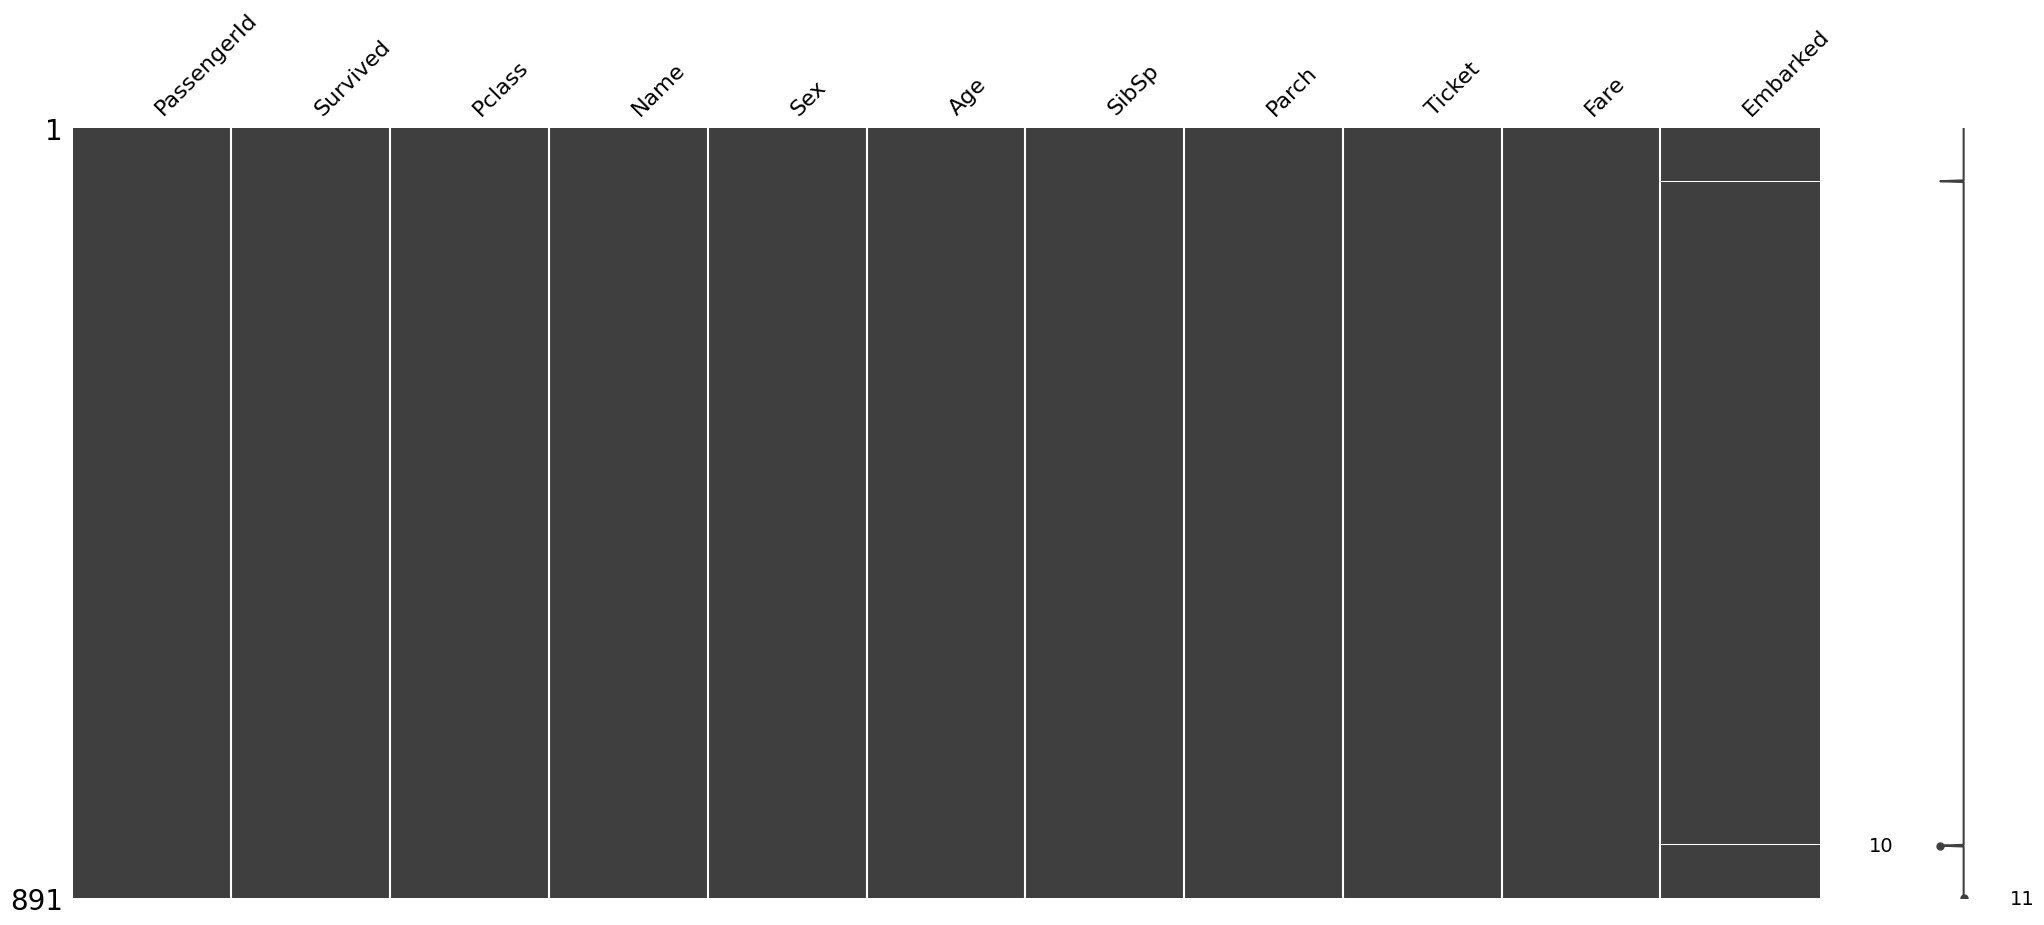

In [85]:
# Step 26: import missingno as msno, to visualise missing values
# Generate a matrix plot showing the missing values in train, providing an intuitive overview of where missing data is located.
# Write your code here
import missingno as msno  # Visualize missing values
msno.matrix(train)

print('NaN values =', train.isnull().sum().sum())
print("""""")
vars_with_missing = []
for feature in train.columns:
    missings = train[feature].isna().sum()
    if missings > 0 :
        vars_with_missing.append(feature)
        missings_perc = missings / train.shape[0]
        print('Variable {} has {} records ({:.2%}) with missing values.'.format(feature, missings, missings_perc))
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

In [86]:
mode_imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
train['Embarked '] = mode_imp.fit_transform(train[['Embarked ']]).ravel()

KeyError: "None of [Index(['Embarked '], dtype='object')] are in the [columns]"

In [90]:
## Imbalanced Classes

In [91]:
As observed in the **Target** variables above, the proportion of records with target=1 is far less than target=0. This can lead to a model that has great accuracy but does not have any added value in practice.
Two possible strategies to deal with this problem are:
* oversampling records with target=1
* undersampling records with target=0

There are many more strategies of course and MachineLearningMastery.com gives a [nice overview](https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/).

SyntaxError: invalid syntax (2059525731.py, line 1)

In [92]:
#### Handling imbalanced classes using **Imbalanced-learn library** (https://imbalanced-learn.org/stable/index.html)

In [95]:
train.Survived.value_counts(0)

Survived
0    549
1    342
Name: count, dtype: int64

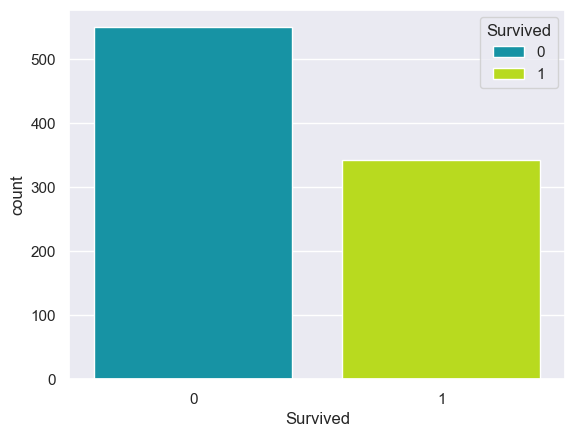

In [97]:
sns.set_style('white')
sns.set(font_scale=1)
plt.figure()
sns.countplot(x=train.Survived, hue=train.Survived, palette='nipy_spectral')
plt.show()

C:\Users\uSer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
C:\Users\uSer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


[(0, 342), (1, 342)]


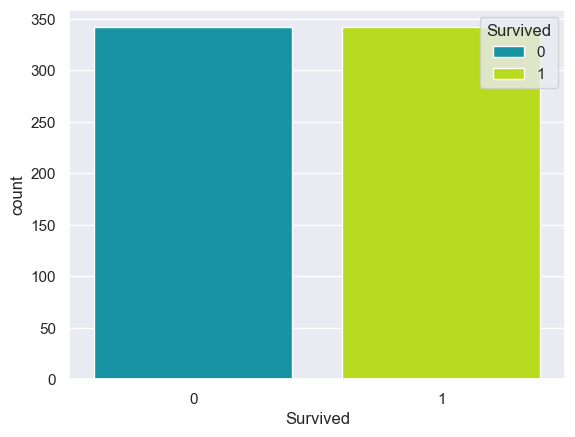

In [99]:
rus = RandomUnderSampler(random_state=0, replacement=True)
X_resampled, y_resampled = rus.fit_resample(train, train.Survived)

print(sorted(Counter(y_resampled).items()))
sns.set_style('white')
sns.set(font_scale=1)
plt.figure()
sns.countplot(x=y_resampled,hue=y_resampled, palette='nipy_spectral')
plt.show()

C:\Users\uSer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
C:\Users\uSer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


[(0, 549), (1, 549)]


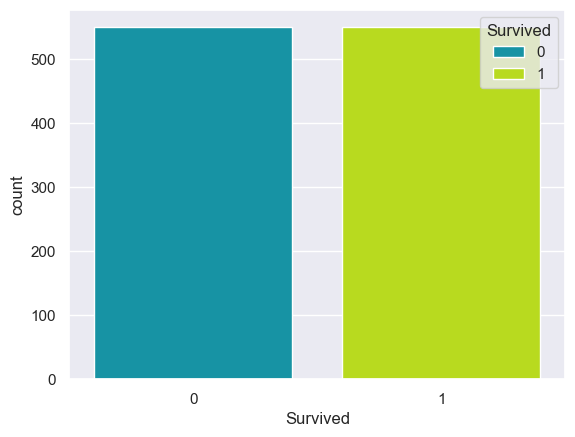

In [101]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(train, train.Survived)

print(sorted(Counter(y_resampled).items()))
sns.set_style('white')
sns.set(font_scale=1)
plt.figure()
sns.countplot(x=y_resampled, hue=y_resampled, palette='nipy_spectral')
plt.show()

In [102]:
**Using SMOTE**

SMOTE is the Synthetic Minority Oversampling Technique, which is part of the imbalanced-learn library. SMOTE is an oversampling technique that generates synthetic samples for the minority class by creating new instances based on existing data. Unlike random oversampling, which simply duplicates existing samples, SMOTE generates new synthetic data points by interpolating between existing minority class samples.

SyntaxError: invalid syntax (228921814.py, line 1)

In [113]:
from sklearn.preprocessing import LabelEncoder

train = train.drop(['Name', 'Ticket', 'Cabin'], axis=1, errors='ignore')

# Encode categorical variables
label_enc = LabelEncoder()
for col in ['Sex', 'Embarked']:
    if col in train.columns:
        train[col] = label_enc.fit_transform(train[col])

# Check the data types to confirm all are numeric
print(train.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
dtype: object


C:\Users\uSer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\uSer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


[(0, 549), (1, 549)]


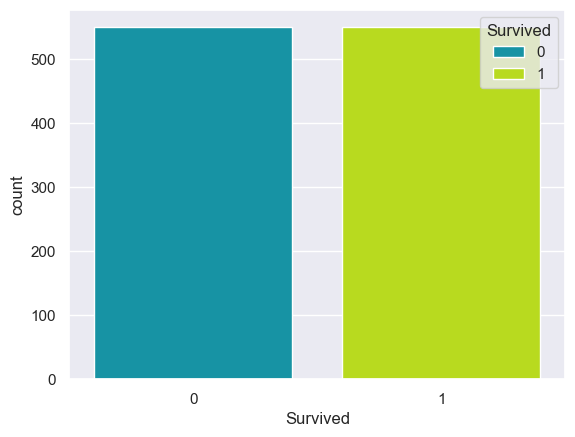

In [114]:
X_resampled, y_resampled = SMOTE().fit_resample(train, train.Survived)
print(sorted(Counter(y_resampled).items()))
sns.set_style('white')
sns.set(font_scale=1)
plt.figure()
sns.countplot(x=y_resampled,hue=y_resampled, palette='nipy_spectral')
plt.show()

In [ ]:
#### Handling imbalanced classes using a simple algorithm to achieve a controlled imbalance, where the minority class (target=1) makes up a specific desired proportion (10%) of the overall dataset, and the majority class (target=0) comprises the remaining 90%.


In [123]:
print(idx_0)

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       539, 540, 541, 542, 543, 544, 545, 546, 547, 548],
      dtype='int64', length=549)


In [124]:
print(undersampled_nb_0)

3077


In [125]:
undersampled_nb_0 = min(int(undersampling_rate * nb_0), len(idx_0))

In [126]:
from sklearn.utils import shuffle


Rate to undersample records with target=0: 5.60655737704918
Number of records with target=0 after undersampling: 3077


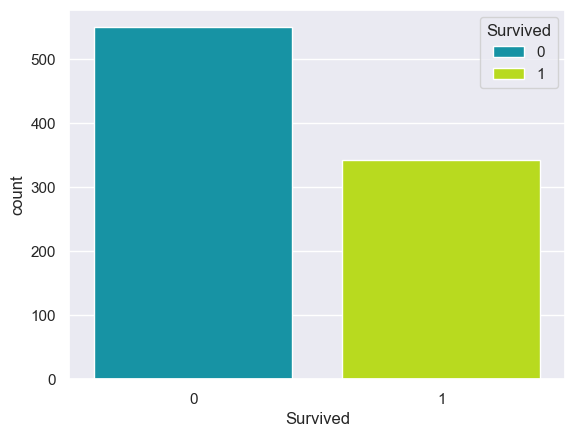

In [127]:
desired_apriori=0.1
# Get the indices per target value
idx_0 = train[train.Survived == 0].index
idx_1 = train[train.Survived == 1].index

# Get original number of records per target value
nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])

# Calculate the undersampling rate and resulting number of records with target=0
undersampling_rate = ((1-desired_apriori)*nb_1)/(nb_0*desired_apriori)
undersampled_nb_0 = int(undersampling_rate*nb_0)
print('Rate to undersample records with target=0: {}'.format(undersampling_rate))
print('Number of records with target=0 after undersampling: {}'.format(undersampled_nb_0))

undersampled_idx = shuffle(idx_0, random_state=37)[:undersampled_nb_0]


# Construct list with remaining indices
idx_list = list(undersampled_idx) + list(idx_1)

# Return undersample data frame
train = train.loc[idx_list].reset_index(drop=True)

sns.set_style('white')
sns.set(font_scale=1)
plt.figure()
sns.countplot(x=train['Survived'], hue=train['Survived'], palette='nipy_spectral')
plt.show()

In [ ]:
# Feature Engineering <a name='feature_engineering'></a>

In [132]:
### Handling high-cardinality categorical attributes using Target Encoding


In [146]:
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Embarked'], dtype='object')


In [147]:
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None,
                  tst_series=None,
                  target=None,
                  min_samples_leaf=1,
                  smoothing=1,
                  noise_level=0):
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)

    # Compute target mean
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])

    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))

    # Apply average function to all target data
    prior = target.mean()

    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)

    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)

    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)

    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

train["male"] = train["1"].astype(int)
test["female"] = test["0"].astype(int)

train_encoded, test_encoded = target_encode(train["Sex"],
                             test["Sex"],
                             target=train.Survived,
                             min_samples_leaf=100,
                             smoothing=10,
                             noise_level=0.01)

train['Sex'] = train_encoded
train.drop('Sex', axis=1, inplace=True)
meta2.loc['Sex','preserve'] = False 

KeyError: '1'

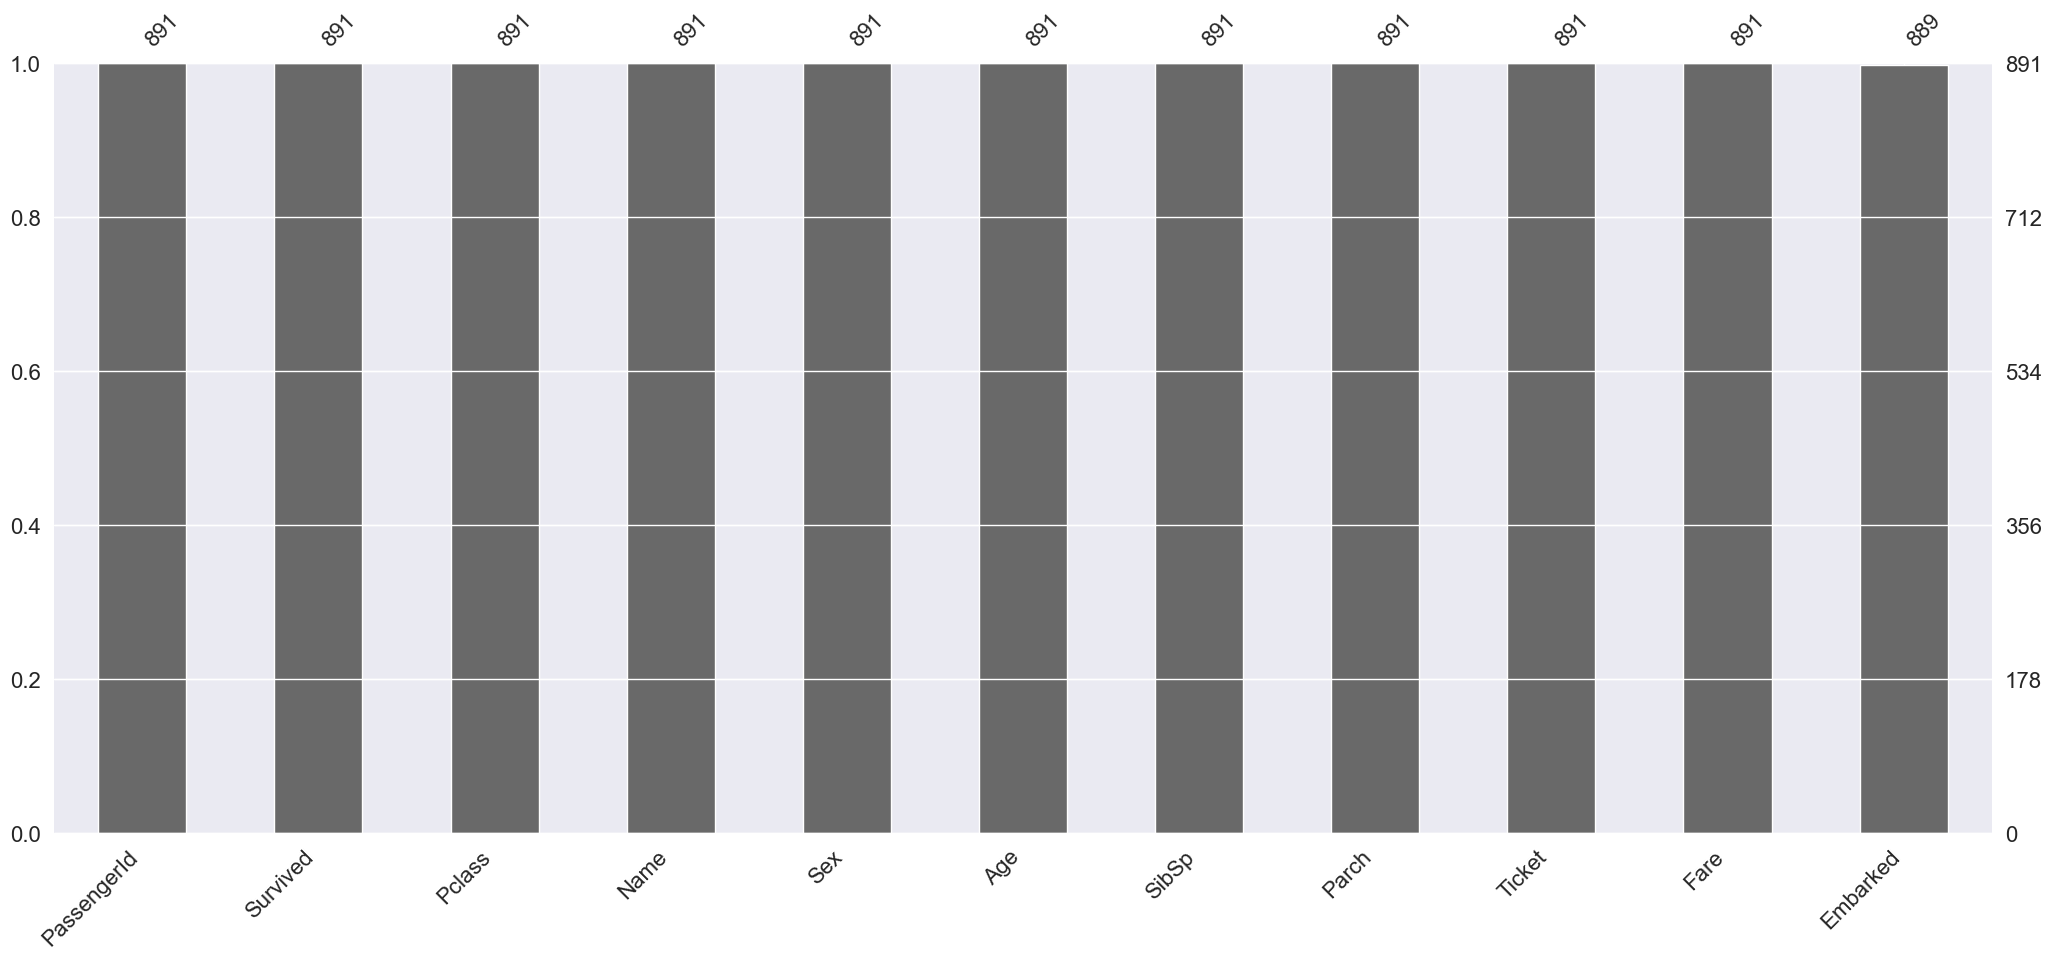

In [104]:
# Step 27: Generate a bar chart where each bar represents the amount of non-missing data in each column of train.
# This is a quick and intuitive way to understand the completeness of the data and spot columsn with missing values.
# Write your code here.
msno.bar(train);

In [ ]:
# Step 28: Generate a heatmap that shows correlations between missing data in different columns of train.
# This heatmap helps identify patterns in missing values: if missing data in one column is likely to occur when another column has missing data.
# Useful for understanding the structure of missing data in your dataset and can inform strategies for handling missing values, such as imputation or removal.
# Write your code here.
msno.heatmap(train)

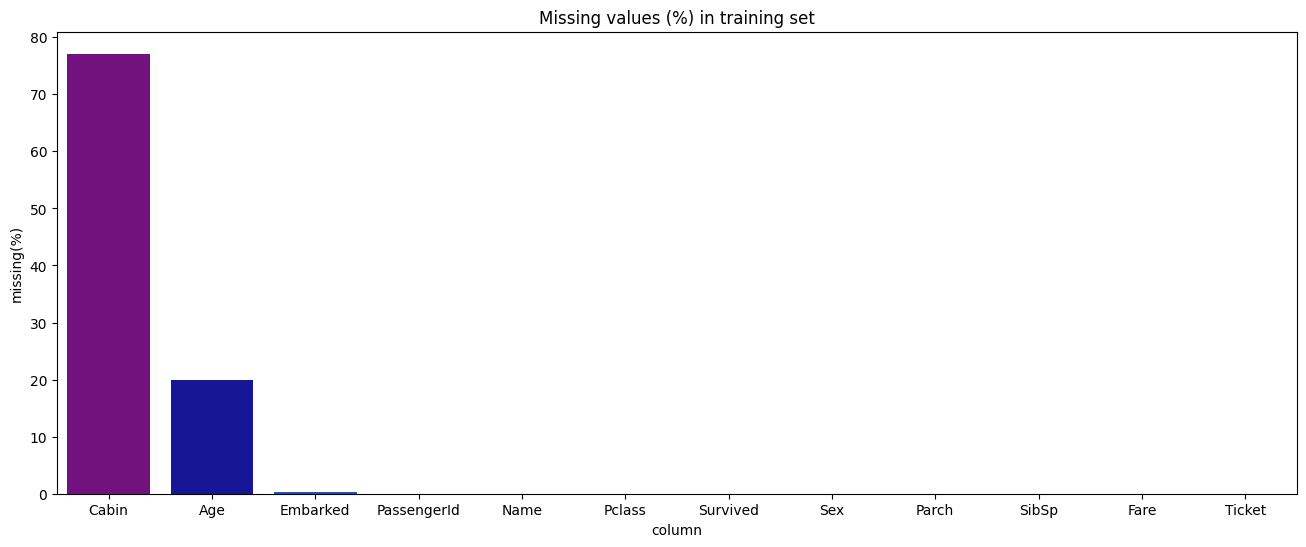

In [36]:
# Step 29: Plot a bar chart of the top 7 variables in the train with the largest number of NaN.
# Write your code here.

df_missing_train = pd.DataFrame({'column':train.columns, 'missing(%)':((train.isna()).sum()/train.shape[0])*100})

df_missing_train_nl = df_missing_train.nlargest(12, 'missing(%)')

sns.set_palette(sns.color_palette('nipy_spectral'))

plt.figure(figsize=(16,6))
sns.barplot(data= df_missing_train_nl, x='column', y='missing(%)', hue = 'column', palette='nipy_spectral', legend=False)
plt.title('Missing values (%) in training set')
plt.show()


Observations: Missing value proportions tend to be consistent across the train and test datasets.

# Univariate Exploration

## Binary Features

C:\Users\uSer\AppData\Local\Temp\ipykernel_8024\3268436647.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train['Survived'],palette='nipy_spectral')


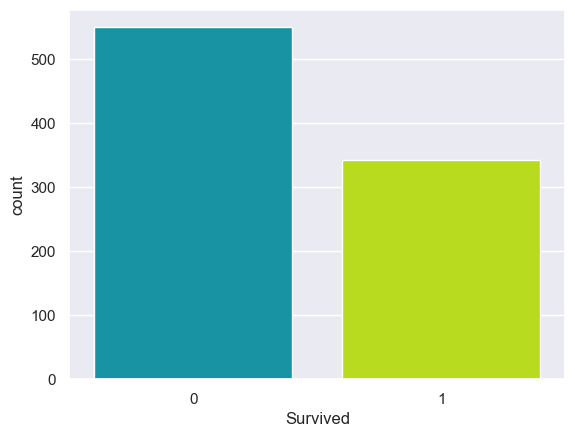

In [37]:
# Step 30: Plot the histogram of the target column within the train dataset.
# Write your code here.
sns.set_style('white')
sns.set(font_scale=1)
plt.figure()
sns.countplot(x=train['Survived'],palette='nipy_spectral')
plt.show()

In [38]:
# Step 31: Seoect the indices (or column names) from meta2 where the type is 'binary' and preserve is True.
# Select the binary columns in train that should be preserved and provide summary statistics (count, mean, std, etc.) for those columns.
# Write your code here.
v = meta2[(meta2.type == 'binary') & (meta2.preserve)].index
train[v].describe()

,Survived
count,891.000000
mean,0.383838
std,0.486592
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


Observations:

- The mean value of **target** in the **train** dataset is 3.6448%, which is **strongly imbalanced** between zeros and ones.
- From the means we can conclude that for most variables the value is zero in most cases.

<Figure size 640x480 with 0 Axes>

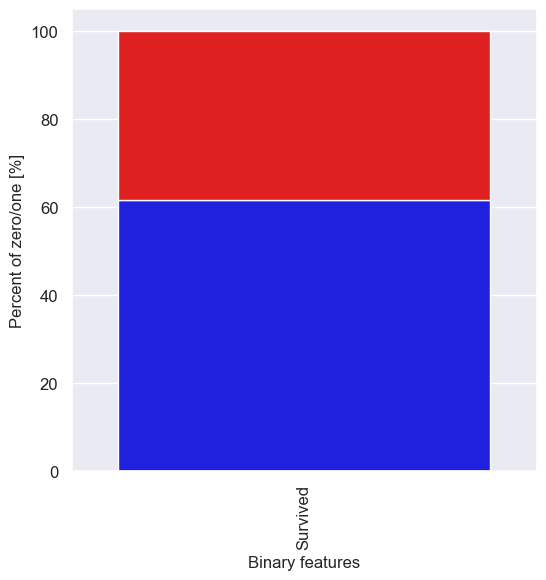

In [39]:
# Step 32: Plot the distribution of the binary data in the train dataset.
# Blue represents the percent of 0.
# Red represents the percent of 1.
# Write your code here.
bin_col = [ col for col in train.columns
    if set(train[col].unique()) == {0, 1}]
zero_list = []
one_list = []
for col in bin_col:
    zero_list.append((train[col]==0).sum()/train.shape[0]*100)
    one_list.append((train[col]==1).sum()/train.shape[0]*100)
plt.figure()
fig, ax = plt.subplots(figsize=(6,6))
# Bar plot
p1 = sns.barplot(ax=ax, x=bin_col, y=zero_list, color="blue")
p2 = sns.barplot(ax=ax, x=bin_col, y=one_list, bottom= zero_list, color="red")
plt.ylabel('Percent of zero/one [%]', fontsize=12)
plt.xlabel('Binary features', fontsize=12)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

Observations: **ps_ind_10_bin**, **ps_ind_11_bin**, **ps_ind_12_bin** and **ps_ind_13_bin** have very small number of values 1 (less than 0.5%) whilst the number of value 1 is very large for **ps_ind_16_bin** and **ps_calc_16_bin** (more than 60%).



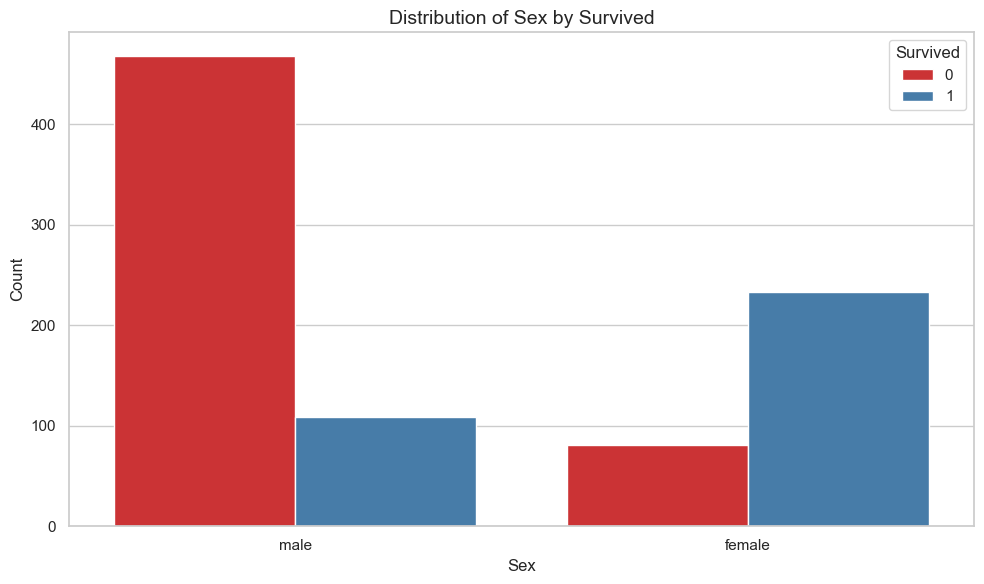

In [40]:
# Step 33: Plot the distribution of binary variables and the corresponding values of the target variable.
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Identify binary columns (those with exactly two unique values and exclude 'Survived')
binary_columns = [col for col in train.columns if train[col].nunique() == 2 and col != 'Survived']

# Step 2: Set the style for the plots
sns.set_style('whitegrid')

# Step 3: Create a figure for the plot
plt.figure(figsize=(10, 6))

# Step 4: Plot the distribution of binary features for both target classes (Survived=0 and Survived=1)
for feature in binary_columns:
    sns.countplot(x=feature, hue='Survived', data=train, palette='Set1')  # Count plot for each binary feature
    plt.ylabel('Count', fontsize=12)
    plt.xlabel(feature, fontsize=12)
    plt.title(f'Distribution of {feature} by Survived', fontsize=14)
    plt.legend(title='Survived', loc='best')

# Step 5: Show the plot
plt.tight_layout()
plt.show()



### Categorical (Nominal) Features

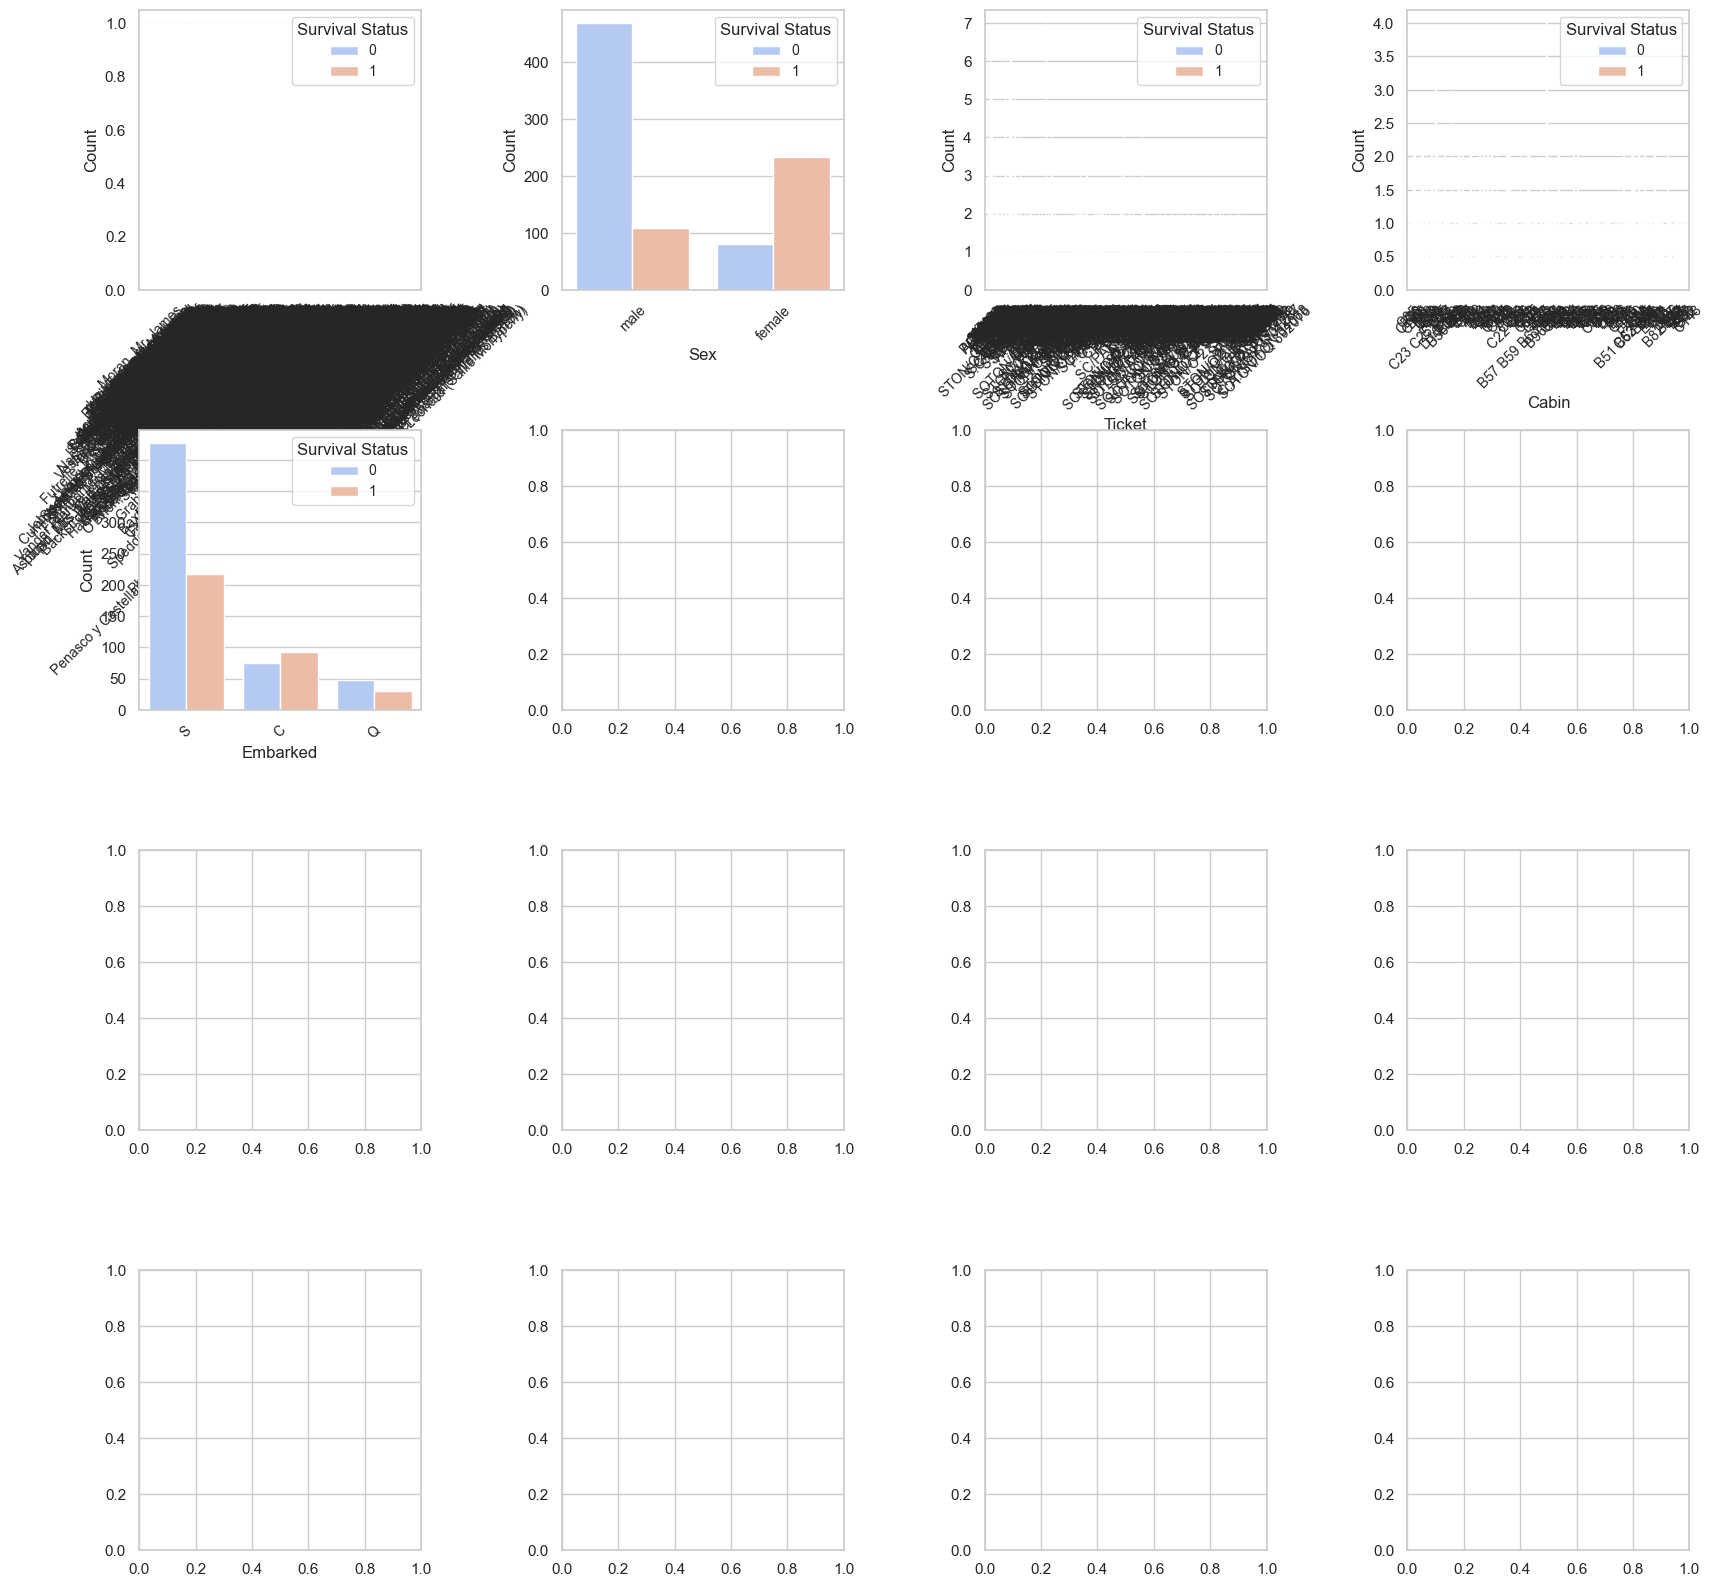

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Split the dataset based on 'Survived' values
t1 = train[train['Survived'] == 1]  # Subset where Survived=1
t0 = train[train['Survived'] == 0]  # Subset where Survived=0

# Identify categorical variables in the dataset
categorical_columns = train.select_dtypes(include=['object', 'category']).columns

# Set up the plot
sns.set_style('whitegrid')

# Increase the figure size and adjust layout spacing
fig, ax = plt.subplots(4, 4, figsize=(20, 20))  # Increase figure size
plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust spacing between subplots

# Loop through categorical variables and plot their distribution for Survived=1 and Survived=0
for i, feature in enumerate(categorical_columns):
    if i >= 16:  # Limit to 16 features for display
        break
    plt.subplot(4, 4, i + 1)

    # Use 'hue' for differentiating Survived=1 and Survived=0 in countplot
    sns.countplot(x=feature, data=train, hue='Survived', palette='coolwarm')

    # Add labels and legend
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(title='Survival Status', loc='best', fontsize=10)
    plt.xticks(rotation=45, fontsize=10)

plt.show()


<Axes: xlabel='Age', ylabel='Count'>

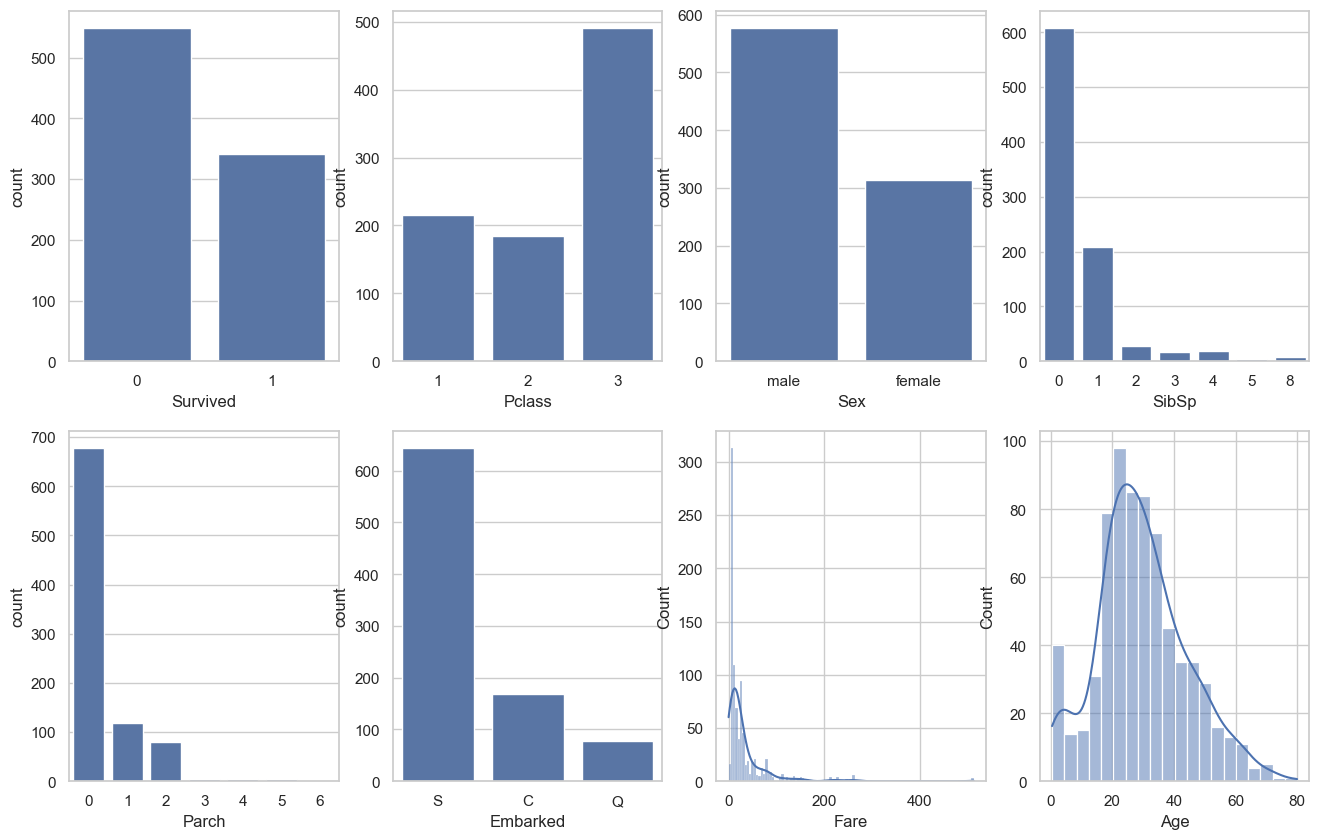

In [42]:
# Step 34: Plot the distribution of categorical variables and there corresponding values of the target variable.
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
sns.countplot(x='Survived', data=train, ax=axes[0, 0])  # Specify x for the column to count
sns.countplot(x='Pclass', data=train, ax=axes[0, 1])  # Specify x for the column to count
sns.countplot(x='Sex', data=train, ax=axes[0, 2])  # Specify x for the column to count
sns.countplot(x='SibSp', data=train, ax=axes[0, 3])  # Specify x for the column to count
sns.countplot(x='Parch', data=train, ax=axes[1, 0])  # Specify x for the column to count
sns.countplot(x='Embarked', data=train, ax=axes[1, 1])  # Specify x for the column to count
sns.histplot(train['Fare'], kde=True, ax=axes[1, 2])
sns.histplot(train['Age'].dropna(), kde=True, ax=axes[1, 3])



KeyError: "['target'] not in index"

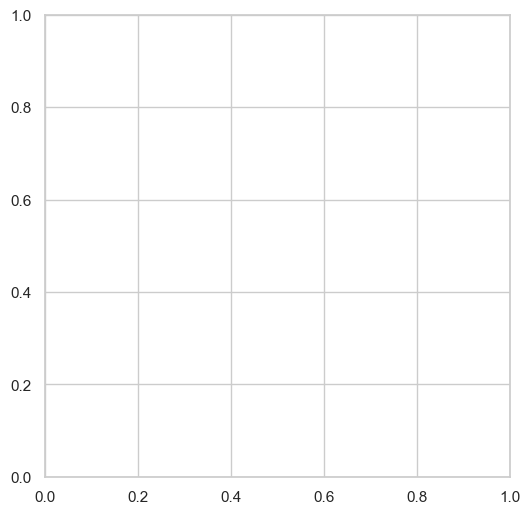

In [43]:
# Step 35: Calculate the percentage of target=1 per category value and represent these percentages using bar plots (histogram).
#Write your code here.
var = meta2[(meta2.type == 'categorical') & (meta2.preserve)].index

for feature in var:
    fig, ax = plt.subplots(figsize=(6,6))
    # Calculate the percentage of target=1 per category value
    cat_perc = train[[feature, 'target']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    # Bar plot
    # Order the bars descending on target mean
    custom_colours = sns.color_palette("husl", len(cat_perc[feature]))
    sns.barplot(ax=ax,x=feature, y='target', data=cat_perc, order=cat_perc[feature], hue = feature, palette=custom_colours, legend=False)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=12)
    plt.xlabel(feature, fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

In [ ]:
# Step 36: Check the cardinality of the categorical variables.
# Cardinality refers to the number of different values in a variable.
# Write your code here.
var = meta2[(meta2.type == 'categorical') & (meta2.preserve)].index

for feature in var:
    dist_values = train[feature].value_counts().shape[0]
    print('Variable {} has {} distinct values'.format(feature, dist_values))

Observations: Only **ps_car_11_cat** has many distinct values, although it is still reasonable.

### Real (Interval) Features

In [ ]:
# Step 37: Select the indices (or column names) from meta2 where the type is 'real' and preserve is True.
# Select the real columns in train that should be preserved and provide summary statistics (count, mean, std, etc.) for those columns.
# Write your code here.
variable = meta2[(meta2.type == 'real') & (meta2.preserve)].index
train[variable].describe()

Observation:

**reg**: The range (min to max) differs between the variables. We could apply scaling (e.g. StandardScaler), but it depends on the classifier we will want to use

**car**: Again, the range differs and we could apply scaling

**calc**: This seems to be some kind of ratio as the maximum is 0.9. All three *_calc* variables have very similar distributions

**Overall**, we can see that the range of the interval variables is rather small. Perhaps some transformation (e.g. log) is already applied in order to anonymise the data?


# Bivariate Exploration

In [ ]:
Pclass_survival = train[train.Survived == 1]
Pclass_survival.head()
ax = Pclass_survival.Pclass.value_counts().plot(kind='bar', figsize=(10,7),fontsize=13,color = 'blue');
plt.xticks(np.arange(3), ['Pclass1' , 'Pclass3','Pclass2'] , rotation = 0)
ax.set_alpha(0.8)
ax.set_title(" Survival Rate vs Class ", fontsize=18)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.04, i.get_height()-8, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=22,
                color='white')

## Real (Interval) Features

In [ ]:
#Step 38: Visualise the relationship between features in the Real (Interval) variables using Correlation Matrix.

# Recreate the corr_heatmap function
def corr_heatmap(sample, masking=False):
    sns.set_style('whitegrid')
    # Create color map ranging between two colors
    cmap = sns.diverging_palette(50, 10, as_cmap=True)
    fig, ax = plt.subplots(figsize=(10,10))

    if masking == False:
        correlations = sample.corr()  # Compute the correlation matrix
        sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
                    square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75})
    else:
        correlations = np.triu(sample.corr())  # Mask upper triangle
        sns.heatmap(sample.corr(), cmap=cmap, vmax=1.0, center=0, fmt='.2f',
                    square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75},
                    mask=correlations)
    plt.show()

# Now proceed with sampling and correlation heatmap generation
sample_size = min(900, train.shape[0])  # Ensure sample size is within the available rows
sample = train.sample(sample_size)

# Extract real (interval) variables based on meta2
var = meta2[(meta2['type'] == 'real') & (meta2['preserve'])].index
sample = sample[var]  # Select only real variables

# Call the function to plot the correlation heatmap
corr_heatmap(sample)


In [ ]:
#Step 39: Visualise the relationship between features in the Real (Interval) variables using Correlation Matrix.
# Using masking=True, hide one half of the symmetric matrix to make the heatmap less cluttered and easier to read.
#Write your code here.
corr_heatmap(sample, masking=True)

In [ ]:
# Step 40: Visualise the features with strong correlations in the Real (Interval) variables using Pairplot

# Select the real (interval) variables (e.g., 'Age', 'Fare', etc.) from the Titanic dataset
var = ['Age', 'Fare']  # Select the real (interval) variables you want to plot

# Dynamically adjust the sample size based on the number of rows in train
sample_size = min(1000, train.shape[0])  # Ensure sample size does not exceed the number of rows in train
sample = train.sample(sample_size)  # Sample from the dataset

# Add 'Survived' as the target variable to the sample
sample = sample[var + ['Survived']]  # Including the target variable in the sample

# Create the pairplot using the selected real variables and the target variable for hue
sns.pairplot(sample, hue='Survived', palette='Set1', diag_kind='kde')

# Show the plot
plt.show()


In [ ]:
# Step 41: Visualise the correlation between two specific features in the Real (Interval) variables using linear model plot (lmplot)

# Choose two real (interval) variables from the Titanic dataset, e.g., 'Age' and 'Fare'
sns.lmplot(x='Age', y='Fare', data=train,
           hue='Survived', palette='Set1',
           scatter_kws={'alpha':0.3})  # Scatter plot with transparency for better visualization

# Display the plot
plt.show()


In [ ]:
# Step 42: Visualise the correlation between two specific features in the Real (Interval) variables using linear model plot (lmplot)
# Choose ps_car_15 and ps_car_13
# Write your code here.
#sns.lmplot(x='ps_car_15', y='ps_car_13', data=sample,
           #hue='target', palette='Set1',
          # scatter_kws={'alpha':0.3})
#plt.show()

In [ ]:
# Step 43: Visualise the correlation between two specific features in the Real (Interval) variables using linear model plot (lmplot)
# Choose ps_car_12 and ps_car_13
# Write your code here.
#sns.lmplot(x='ps_car_12', y='ps_car_13', data=sample,
          # hue='target', palette='Set1',
          # scatter_kws={'alpha':0.3})
#plt.show()

In [ ]:
# Step 44: Visualise the correlation between two specific features in the Real (Interval) variables using linear model plot (lmplot)
# Choose ps_car_12 and ps_car_14
# Write your code here.
#sns.lmplot(x='ps_car_12', y='ps_car_14', data=sample,
          # hue='target', palette='Set1',
          # scatter_kws={'alpha':0.3})
#plt.show()

In [ ]:
# Step 45: Visualise the corrleation between 2 specific features in the Real (Interval) variables using Joint-Plot
# Choose ps_reg_02 and pg_reg_03
# Write your code here.
sns.jointplot(x='Age', y='Fare', data=sample,
              kind="hist")

In [ ]:
# Step 46: Visualise the corrleation between 2 specific features in the Real (Interval) variables using Joint-Plot
# Choose ps_car_15 and ps_car_13
# Write your code here.
#sns.jointplot(x='ps_car_15', y='ps_car_13', data=sample,
              #kind="hist")

In [ ]:
# Step 47: Visualise the corrleation between 2 specific features in the Real (Interval) variables using Joint-Plot
# Choose ps_car_12 and ps_car_13
# Write your code here.
#sns.jointplot(x='ps_car_12', y='ps_car_13', data=sample,
              #kind="hist")

In [ ]:
# Step 48: Visualise the corrleation between 2 specific features in the Real (Interval) variables using Joint-Plot
# Choose ps_car_12 and ps_car_14
# Write your code here.
#sns.jointplot(x='ps_car_12', y='ps_car_14', data=sample,
              #kind="hist")

In [ ]:
# Step 49: Visualise the relationship between 2 specific features in the Real (Interval) variables that are not correlated using both lmplot and joint-plot.


# Dynamically adjust the sample size based on the number of rows in train
sample_size = min(1000, train.shape[0])  # Ensure sample size does not exceed the number of rows in train
sample_nc = train.sample(sample_size)

# Select relevant columns for the analysis (using variables from Titanic dataset)
var_nc = ['Age', 'Fare', 'SibSp', 'Survived']  # Choose 'Age' and 'Fare' as an example of non-correlated variables
sample_nc = sample_nc[var_nc]

# Visualize using lmplot
sns.lmplot(x='Age', y='Fare', data=sample_nc,
           hue='Survived', palette='Set1', scatter_kws={'alpha':0.3})
sns.lmplot(x='Age', y='SibSp', data=sample_nc,
           hue='Survived', palette='Set1', scatter_kws={'alpha':0.3})

# Visualize using jointplot
sns.jointplot(x='Age', y='Fare', data=sample_nc, kind="hist")
sns.jointplot(x='Age', y='SibSp', data=sample_nc, kind="hist")

# Show the plots
plt.show()

plt.show()


In [ ]:
# Step 49: Visualise the relationship between 2 specific features in the Real (Interval) variables that are not correlated using both lmplot and joint-plot.
# Choose ps_calc_01 and ps_calc_02
# Choose ps_calc_01 and ps_calc_03
# Write your code here.
#sample_nc = train.sample(1000)
#var_nc = ['ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'target']
#sample_nc = sample_nc[var_nc]

#sns.lmplot(x='ps_calc_01', y='ps_calc_02', data=sample_nc,
        #   hue='target', palette='Set1', scatter_kws={'alpha':0.3})
#sns.lmplot(x='ps_calc_01', y='ps_calc_03', data=sample_nc,
          # hue='target', palette='Set1', scatter_kws={'alpha':0.3})

#sns.jointplot(x='ps_calc_01', y='ps_calc_02', data=sample_nc, kind="hist")
#sns.jointplot(x='ps_calc_02', y='ps_calc_03', data=sample_nc, kind="hist")

#plt.show()

## Integer (Ordinal) Features

In [ ]:
# Step 50: Visualise the relationship between features in the Integer (Ordinal) variables using Correlation Matrix.
# Write your code here.
sample_size = min(1000, train.shape[0]) # Ensure sample size does not exceed the number of rows in train
sample = train.sample(sample_size)
var = meta2[(meta2.type == 'integer') & (meta2.preserve)].index
sample = sample[var]
corr_heatmap(sample)

Observation: For the integer variables, we do not see any correlations.

In [ ]:
#import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 50: Visualise the relationship between features in the Integer (Ordinal) variables using Correlation Matrix.

# Sample the dataset
sample_size = min(1000, train.shape[0])  # Ensure sample size does not exceed the number of rows in train
sample = train.sample(sample_size)

# Extract integer (ordinal) variables based on meta2
var = meta2[(meta2['type'] == 'integer') & (meta2['preserve'])].index
sample = sample[var]  # Select only integer (ordinal) variables

# Define the corr_heatmap function (if not already defined)
def corr_heatmap(sample, masking=False):
    sns.set_style('whitegrid')
    cmap = sns.diverging_palette(50, 10, as_cmap=True)
    fig, ax = plt.subplots(figsize=(10, 10))

    if not masking:
        correlations = sample.corr()  # Compute the correlation matrix
        sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
                    square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75})
    else:
        correlations = np.triu(sample.corr())  # Mask upper triangle
        sns.heatmap(sample.corr(), cmap=cmap, vmax=1.0, center=0, fmt='.2f',
                    square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75}, mask=correlations)
    plt.show()

# Call the corr_heatmap function
corr_heatmap(sample)


In [ ]:
# Step 51: Visualise the relationship between features in the Integer (Ordinal) variables using Kendall and Speakman correlation calculation methods.
# Write your code here.
def corr_heatmap1(sample, method):
    sns.set_style('whitegrid')
    # Create color map ranging between two colors
    cmap = sns.diverging_palette(50, 10, as_cmap=True)
    fig, ax = plt.subplots(figsize=(10,10))
    correlations = sample.corr(method)
    sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75})
    plt.show();
corr_heatmap1(sample, 'kendall')
corr_heatmap1(sample, 'spearman')

In [ ]:
# Step 52: Explore the relationship between features in the Integer (Ordinal) variables using joint-plot.
# Choose ps_ind_01 and ps_ind_03
# Write your code here.
sns.jointplot(x='Pclass', y='SibSp', data=sample, kind="hist")
plt.show()

In [ ]:
# Step 53: Explore the relationship between features in the Integer (Ordinal) variables using joint-plot.
# Choose ps_ind_01 and ps_calc_04
# Write your code here.
sns.jointplot(x='Pclass', y='Parch', data=sample, kind="hist")
plt.show()

In [ ]:
# Step 54: Visualise the probabilities of the possible values for a variable using Probability Mass Function.
# PMF requires the empiricaldist package.
!pip install empiricaldist


In [ ]:
# Write your code here.
from empiricaldist import Cdf, Pmf
train_pmf = train.sample(n = 500)
fig, ax = plt.subplots()
# Extract the unique categories
categories = train_pmf['ps_ind_02_cat'].unique()
for cat in categories:
    pmf_cat = Pmf.from_seq(train_pmf[
        train_pmf['ps_ind_02_cat'] == cat]['ps_car_12'])
    ax.plot(pmf_cat, label=cat)
ax.set(xlabel='ps_car_12',
       ylabel='P(X = x)')
plt.title('The number of categories: {}'.format(len(categories)))
ax.legend()
plt.show();

In [ ]:


# Example: Using 'Pclass' as the categorical feature and 'Fare' as the numerical feature
plt.figure(figsize=(8, 6))
sns.boxenplot(
    x='Pclass',  # Replace with your categorical feature
    y='Fare',    # Replace with your numerical feature
    data=train,  # Ensure 'train' DataFrame contains these columns
    palette='coolwarm'
)

# Add titles and labels
plt.title('Distribution of Fare Across Pclass', fontsize=14)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Fare', fontsize=12)

# Rotate x-axis labels if needed
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Step 55: Visualise the distribution between 2 specific features using boxenplot.
# Write your code here.
sns.boxenplot(x=train_pmf.ps_car_14.astype('float'),
              y=train_pmf.ps_car_10_cat.astype('category'))

In [ ]:
# Step 56: Visualise the distribution between 50 samples for features in the Integer (Ordinal) variables using clustermap.
# Write your code here.
train_clustermap = train.sample(n = 50)
int_features = train_clustermap.select_dtypes(include=['int64']).columns.tolist()
ordinal_features = [o for o in int_features if
                    ('cat' not in o and 'bin' not in o and 'id' not in o and 'target' not in o )]
ord_features_df = train_clustermap[ordinal_features]
sns.clustermap(ord_features_df)

In [45]:
Imbalance Classes

SyntaxError: invalid syntax (2052886692.py, line 1)

In [55]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title'],
      dtype='object')

C:\Users\uSer\AppData\Local\Temp\ipykernel_8024\1634122914.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\uSer\AppData\Local\Temp\ipykernel_8024\1634122914.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

NameError: name 'LabelEncoder' is not defined

## Conclusion
I hope  this notebook helped you learn the exploratory data analysis (EDA) workflow, that is an important initial steps before proceeding to the data preprocessing for the ML model development.